
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains information about 110,527 medical appointments in Brazil with a focus on the reasons why patients miss appointments or fail to attend scheduled appointments without any prior notification or contact with the health service provider. There are 14 columns in the dataset namely: 
> Patient ID - this is the patient identification as every patient has a unique number or code.

> Appointment ID - this is the identification of the appointment. It is also a unique number or code.

> Gender - this is the identification of the patient as a male or female.

> Scheduled Day - this is the actual day of the appointment i.e. the day agreed for the patient to be present.

> Appointment Day - this is the day the patient called to schedule or register an appointment.

> Age - this is how old the patient is.

> Neighbourhood - this is the area where the appointment takes place

> Scholarship - this indicates whether the patient is on the social welfare assistance program (Bolsa Familia) or not

> Hypertension - this column states as true or false if the patient has a high blood pressure or not. (Column was renamed)

> Diabetes - this colunmn tells if the patient has increased levels of blood sugar or not.

> Alcoholism - this column states as true or false if the patien is an alcoholic oor not

> Handicap - this column tells if the patient is handicapped or not. (Column was renamed)

> SMS received - this shows whether the patient received one or more messages.

> No show - this column tells if the patient attended or failed to attend the appointment.

### Question(s) for Analysis

>**1**: What percentage of patients failed to appear for their appointment?

>**2**: Is there an association between gender and patient no-shows?

>**3**: Is there a relationship between age and patient no-shows?

>**4**: What is the relationship between receiving SMS and patient no-shows?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_raw = pd.read_csv('KaggleV2-May-2016.csv')
df_raw.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Here I import the necessary packages and loaded the dataset into the dataframe

In [2]:
labels = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df = pd.read_csv('KaggleV2-May-2016.csv', header=0, names = labels)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> I renamed the column headings because I am more comfortable with using lowercases and it also helps to avoid mistakes.

<a id='wrangling'></a>
## Data Wrangling

In [3]:
df.shape

(110527, 14)

> This shows the number of rows and columns in the dataset. The funtion '.shape()' gave an error hence the reason for using the function '.shape'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>  This shows that there are no missing values in the dataset. It also shows the data types and their distribution within the data set.

> Patient ID should be an integer.

> The scheduled_day and appointment_day are objects and need to be converted to datetime.

> No_show needs to be converted to integer datatype to carry out operations on it.

In [5]:
sum(df.duplicated())

0

> This shows that there are no duplicated rows in the dataset

In [6]:
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
no_show                 2
dtype: int64

> This shows the unique values within the dataset.

> There are 62,299 unique patient IDs which does not tally with the number of entries and appointment IDs (110,527) in the dataset. This may be due to a patient rescheduling or showing up in multiple appointments.

> There are 5 unique values for handicap which should be 2 ideally. This is because a patient is either handicapped or not. This should be normalized.

In [7]:
df.describe(include="all")

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


> This gives a statistical summary of the dataset.

> The majority of clinic visitors are females

> Most patients showed up for their appointments

> Most appointments take place in JARDIM CAMBURI

> The average age of the patient is 37 years with the oldest patient being 115 years.

> The age column has negative values which should be removed.

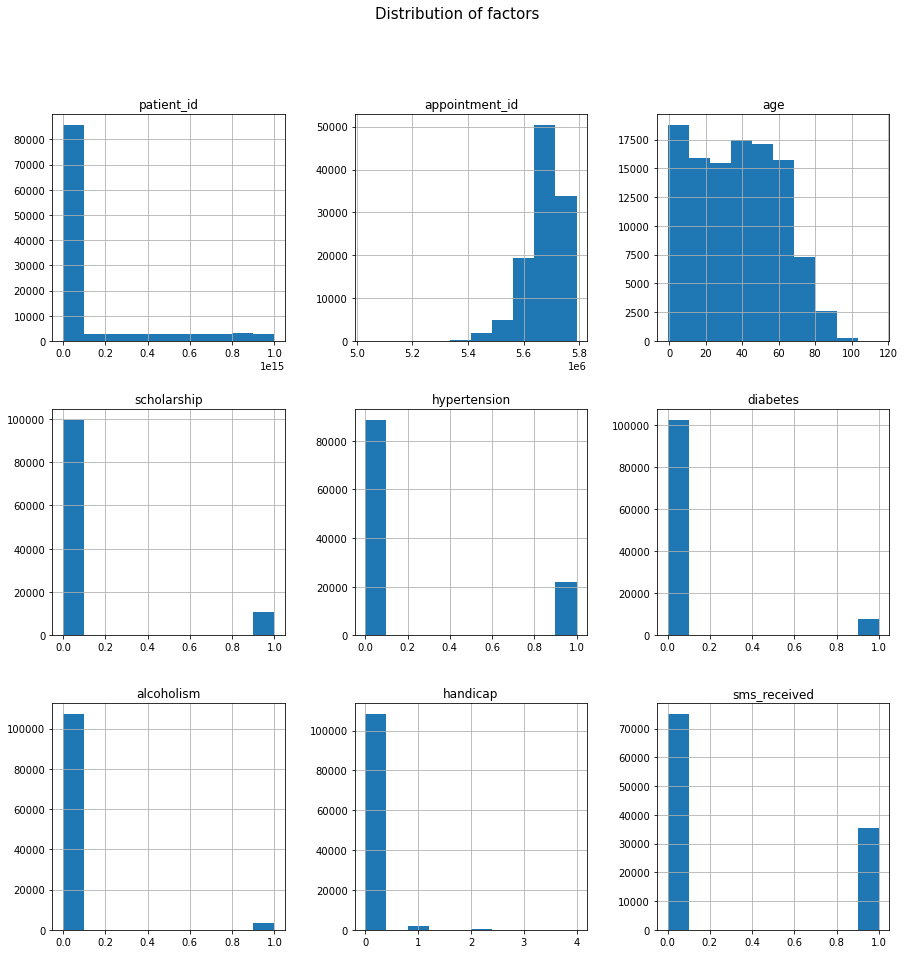

In [8]:
df.hist(figsize=(15,15))
plt.suptitle('Distribution of factors', fontsize=15);

> This is a visualization of each column.

> Most patients are young

> There are very few patients with diabetes, handicap and hypertension.

> Majority of the patients are not on scholarship and did not receive SMS.


### Data Cleaning

In [9]:
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])

In [10]:
df['appointment_day']=pd.to_datetime(df['appointment_day'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

> the datatype of scheduled_day and appointment_day are changed to datetime datatype and was confirmed with the '.info()' function.

In [12]:
df['no_show'].replace({"Yes":0, "No":1}, inplace=True)

In [13]:
df.no_show = df.no_show.astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

> The values for the no_show column are changed: (1 = The patient showed up, 0 = The patient did not show up)

> The datatype for the no_show column was also changed ti integer and was confirmed with the '.info()' function.

In [15]:
df['patient_id'] = df['patient_id'].apply(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

> Here the datatype for patient ID was converted to integer and confirmed with the '.info()' function.

In [17]:
df[df["age"] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [18]:
df = df.drop([99832])

In [19]:
df[df["age"] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  int64              
 1   appointment_id   110526 non-null  int64              
 2   gender           110526 non-null  object             
 3   scheduled_day    110526 non-null  datetime64[ns, UTC]
 4   appointment_day  110526 non-null  datetime64[ns, UTC]
 5   age              110526 non-null  int64              
 6   neighbourhood    110526 non-null  object             
 7   scholarship      110526 non-null  int64              
 8   hypertension     110526 non-null  int64              
 9   diabetes         110526 non-null  int64              
 10  alcoholism       110526 non-null  int64              
 11  handicap         110526 non-null  int64              
 12  sms_received     110526 non-null  int64              
 13 

> The row with the negative age was investigated, dropped and confirmed

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What percentage of patients failed to appear for their appointment?)

In [21]:
no_show_count = df['no_show'].value_counts()
print(no_show_count)

1    88207
0    22319
Name: no_show, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

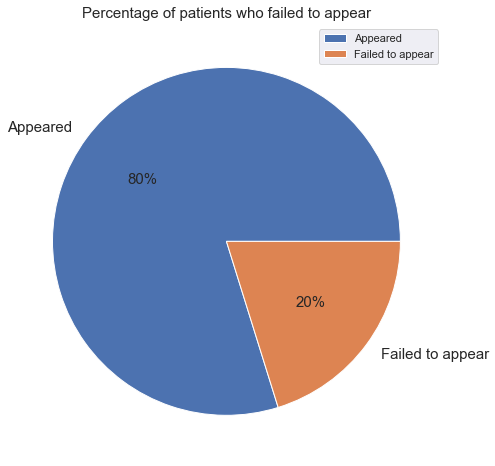

In [22]:
sns.set()
fig=plt.figure(figsize=(8,8))
plt.pie(no_show_count, labels=["Appeared", "Failed to appear"], autopct='%.0f%%', textprops={"fontsize": "15"})
plt.title('Percentage of patients who failed to appear', fontsize=15)
plt.legend();
plt.show

> Here the total number of patients that showed up for their appointments and those that did not were counted. (1 = those that showed up, 0 = those that did not show up.

> From the piechart, it can be seen that majority of the patients showed up for their appointments (80%) while 20% of the patients did not show up for their appointments.

### Research Question 2  (Is there an association between gender and patient no-shows?)

In [23]:
gender_count = df['gender'].value_counts()
print(gender_count)
# gives the total counts of men and women

F    71839
M    38687
Name: gender, dtype: int64


> The number of female patients are double that of the males

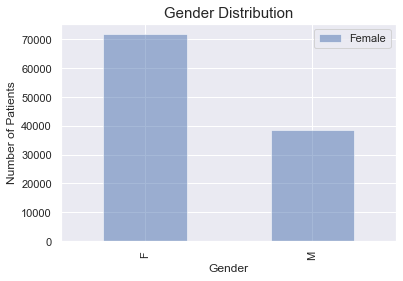

In [24]:
gender_count.plot(kind='bar', alpha=0.5)
plt.title('Gender Distribution', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(['Female', 'Male']);
# A plot of the gender distribution of the patients

In [25]:
df.groupby('gender')['no_show'].value_counts()
# groups the patients data according to their gender and whether they showed up or not

gender  no_show
F       1          57245
        0          14594
M       1          30962
        0           7725
Name: no_show, dtype: int64

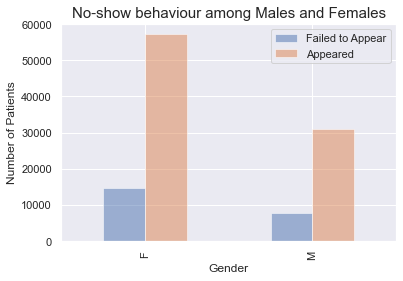

In [26]:
df.groupby(['gender', 'no_show']).count()['patient_id'].unstack().plot(kind='bar', alpha=0.5, stacked=False, grid=True)
plt.title('No-show behaviour among Males and Females', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(['Failed to Appear', 'Appeared']);
# A plot of the no-show behaviour among males and females

> Women showed up more for their appointments than men as seen from the plots

> Both genders are committed to showing up for their appointments

### Research Question 3 (Is there a relationship between age and patient no-shows?)

In [27]:
df['age'].describe()
# gives a summary statistics of the age column

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [28]:
bin_edges = [0, 18, 37, 55, 115]
# dataset is cut into groups using the minimum and maximum age along with the 25th, 50th and 75th percentile 

In [29]:
df['age_class']= pd.cut(df['age'], bin_edges, labels=['young', 'youth', 'adult', 'old'])
df.head()
# groups patients into a new variable called'age_class'

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_class
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,old
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,old
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,old
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,young
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,old


In [30]:
df.groupby('age_class')['age'].mean()
# groups the patients acording to their age class and showup behaviour

age_class
young     8.984088
youth    28.152954
adult    46.671226
old      67.222186
Name: age, dtype: float64

> This outputs the average age for each age class

In [31]:
df['age_class'].value_counts()

# gives total number of patients in each age class

old      27504
youth    27250
adult    26906
young    25327
Name: age_class, dtype: int64

In [32]:
def barPlot(column, xlabel, ylabel, Title, Legend):
    df[column].value_counts().plot(kind='bar', figsize=(7,7), alpha=0.7)
    plt.title(Title, fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend([Legend]);
    
# function to plot bar

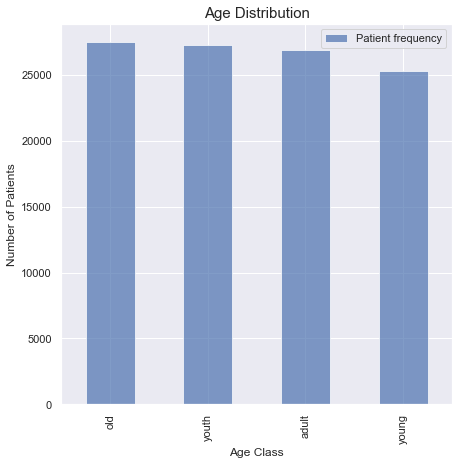

In [33]:
barPlot(column='age_class', xlabel='Age Class', ylabel='Number of Patients', Title='Age Distribution', Legend='Patient frequency')

# gives a plot of age distribution

In [34]:
df.groupby('age_class')['no_show'].value_counts()

# shows the total number of patients that showed up and those that did not.

age_class  no_show
young      1          19619
           0           5708
youth      1          20836
           0           6414
adult      1          21651
           0           5255
old        1          23201
           0           4303
Name: no_show, dtype: int64

In [35]:
def plotBar(column1, column2, xLabel, yLabel, Title1, legend1, legend2):
    df.groupby(column1)[column2].value_counts().unstack().plot(kind='bar', title=Title1, alpha=0.7, stacked=False, grid=True)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend([legend1, legend2]);
    
# function to plot bar

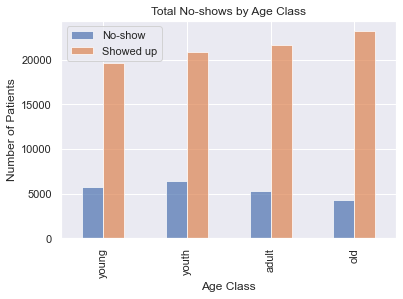

In [36]:
plotBar(column1='age_class', column2='no_show', xLabel='Age Class', yLabel='Number of Patients', Title1='Total No-shows by Age Class', legend1='No-show', legend2='Showed up')

# gives a plot of the total number of patients that showed up and those that did not.

> Patients in the 'old' age class showed up more for their appointments. This shows that the old are more committed.

### Research Question 4 (What is the relationship between receiving SMS and patient no-shows?

In [37]:
df['sms_received'].value_counts()

# gives the total number of patients that received SMS and those that did not

0    75044
1    35482
Name: sms_received, dtype: int64

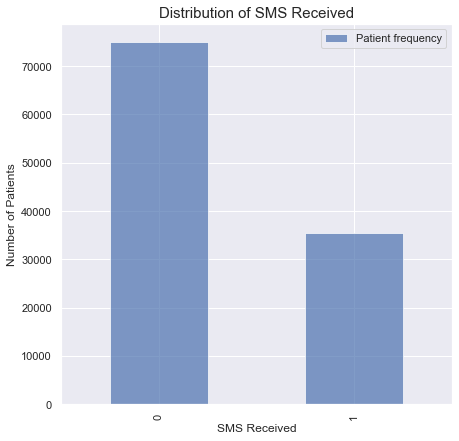

In [38]:
barPlot(column='sms_received', xlabel='SMS Received', ylabel='Number of Patients', Title='Distribution of SMS Received', Legend='Patient frequency')

# gives the distribution of SMS received among the patients

> Majority of the patients did not receive sms

In [39]:
df.groupby('sms_received')['no_show'].value_counts()

# groups patients on the basis of sms received and their no-show behaviour

sms_received  no_show
0             1          62509
              0          12535
1             1          25698
              0           9784
Name: no_show, dtype: int64

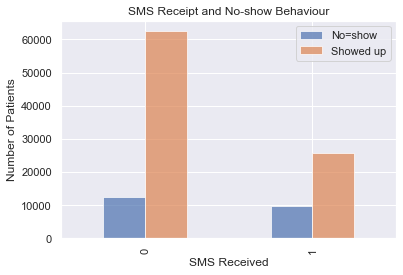

In [40]:
plotBar(column1='sms_received', column2='no_show', xLabel='SMS Received', yLabel='Number of Patients', Title1='SMS Receipt and No-show Behaviour', legend1='No=show', legend2='Showed up')

> A few patients who did not receive SMS did not show up for their appointment

> Most patients who received SMS showed up for their appointments, while a few patients received SMS and still did not show up. 

<a id='conclusions'></a>
## Conclusions

> **1**: About 80% of the total number of patients showed up for their appointments while about 20% did not show up.

> **2**: Females visits to the clinic are more than males. Both genders are committed to showing up for appointments.

>**3**: The old are more committed to keeping their appointments

>**4**: Patients who did not receive SMS still showed up for their appointments

## Limitations

>**1**: Not much inferences can be obtained from the plots as the dataset is mostly categorical in nature. 

## References
> Kaggle https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&source=editors&ust=1653752683050861&usg=AOvVaw3WDOGzy2TH8DlhBpI9s-RM

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Medical_No_Shows_Project.ipynb'])

1